# Breast Cancer Prediction Notebook

This notebook performs data exploration, preprocessing, model training, and evaluation for breast cancer prediction.

In [3]:
import seaborn as sns
print("Seaborn is ready!")


Seaborn is ready!


In [4]:
import sys
print(sys.executable)


c:\Users\LENOVO\Desktop\ML&AI\Projects_Assignment\final_project\breast_cancer_project\.venv\Scripts\python.exe


In [20]:
# Import libraries
import pandas as pd
import numpy as np
# Dataset from Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Set style
sns.set_style('whitegrid')

## Task 1: Load & Understand the Dataset

In [6]:
# Load the dataset from Kaggle CSV
# Download from: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
# Place the data.csv file in the data/ directory

df = pd.read_csv('../data/data.csv')

# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# Map diagnosis to target: M=1 (Malignant), B=0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.rename(columns={'diagnosis': 'target'})

# Get feature names (excluding target)
feature_names = [col for col in df.columns if col != 'target']

# Display first 5 rows
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 📊 Visualization: Target Distribution (Benign vs Malignant)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2476\378008386.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='coolwarm')


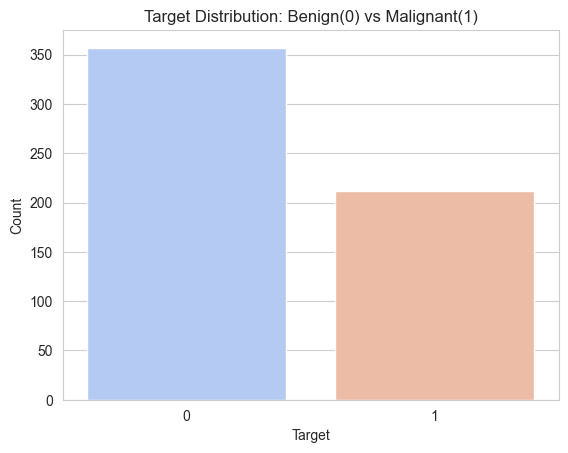

In [22]:
sns.countplot(data=df, x='target', palette='coolwarm')
plt.title("Target Distribution: Benign(0) vs Malignant(1)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


In [7]:
# Dataset shape
print(f"Dataset shape: {df.shape}")

# Target distribution
print("Target distribution:")
print(df['target'].value_counts())
print(f"\nTarget names: ['Benign', 'Malignant']")

Dataset shape: (569, 31)
Target distribution:
target
0    357
1    212
Name: count, dtype: int64

Target names: ['Benign', 'Malignant']


In [8]:
# Summary statistics
df.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 📊 Visualization: Correlation Heatmap

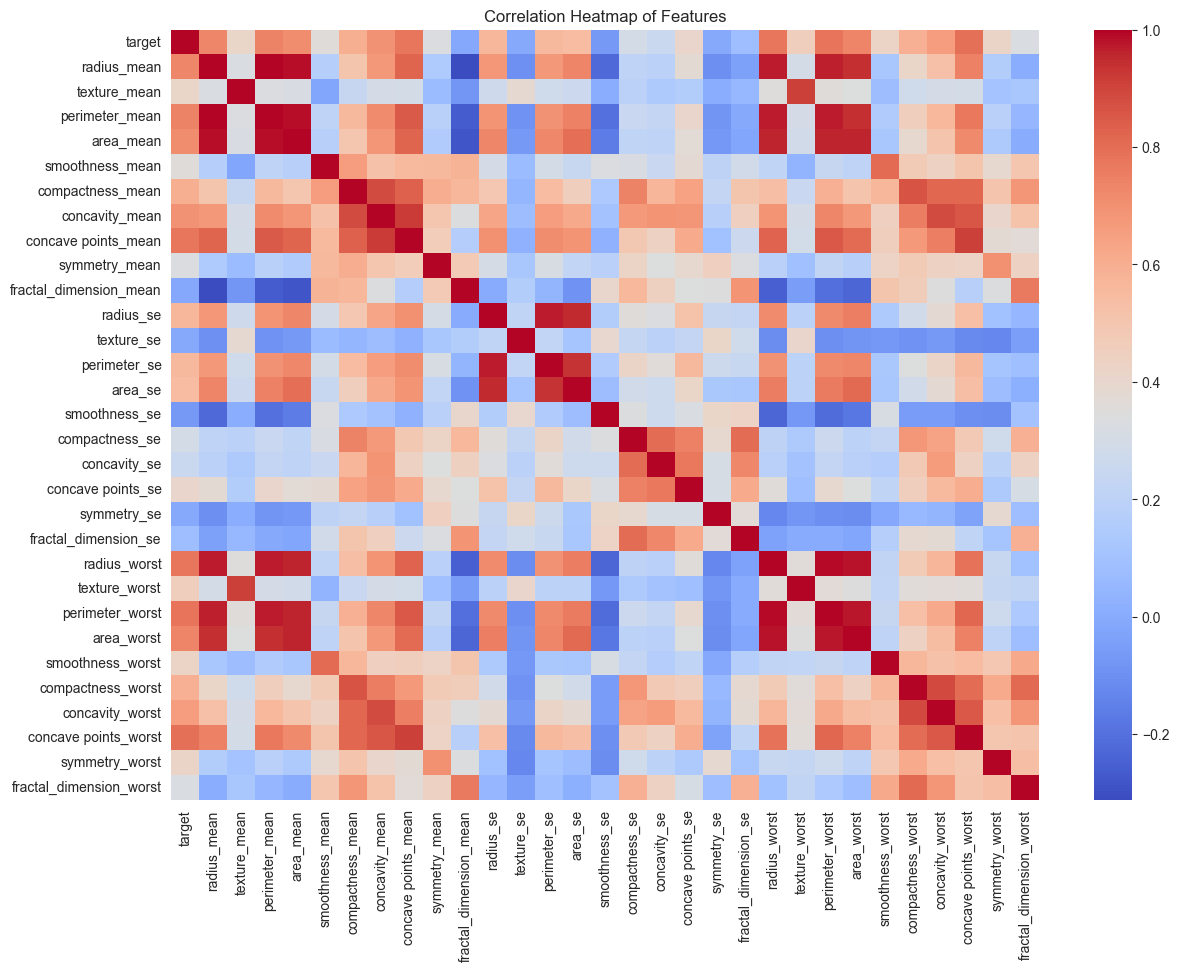

In [15]:
# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()


#  Feature Distribution Visualization

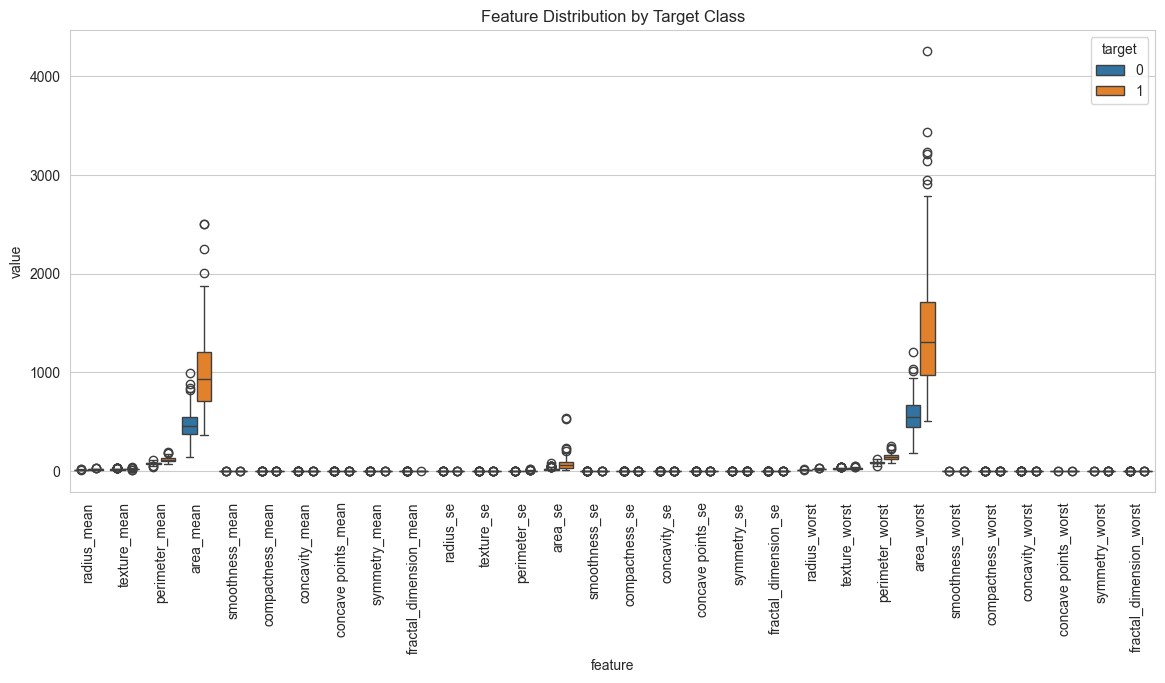

In [23]:
df_melted = df.melt(id_vars='target', var_name='feature', value_name='value')

plt.figure(figsize=(14,6))
sns.boxplot(data=df_melted, x='feature', y='value', hue='target')
plt.xticks(rotation=90)
plt.title("Feature Distribution by Target Class")
plt.show()


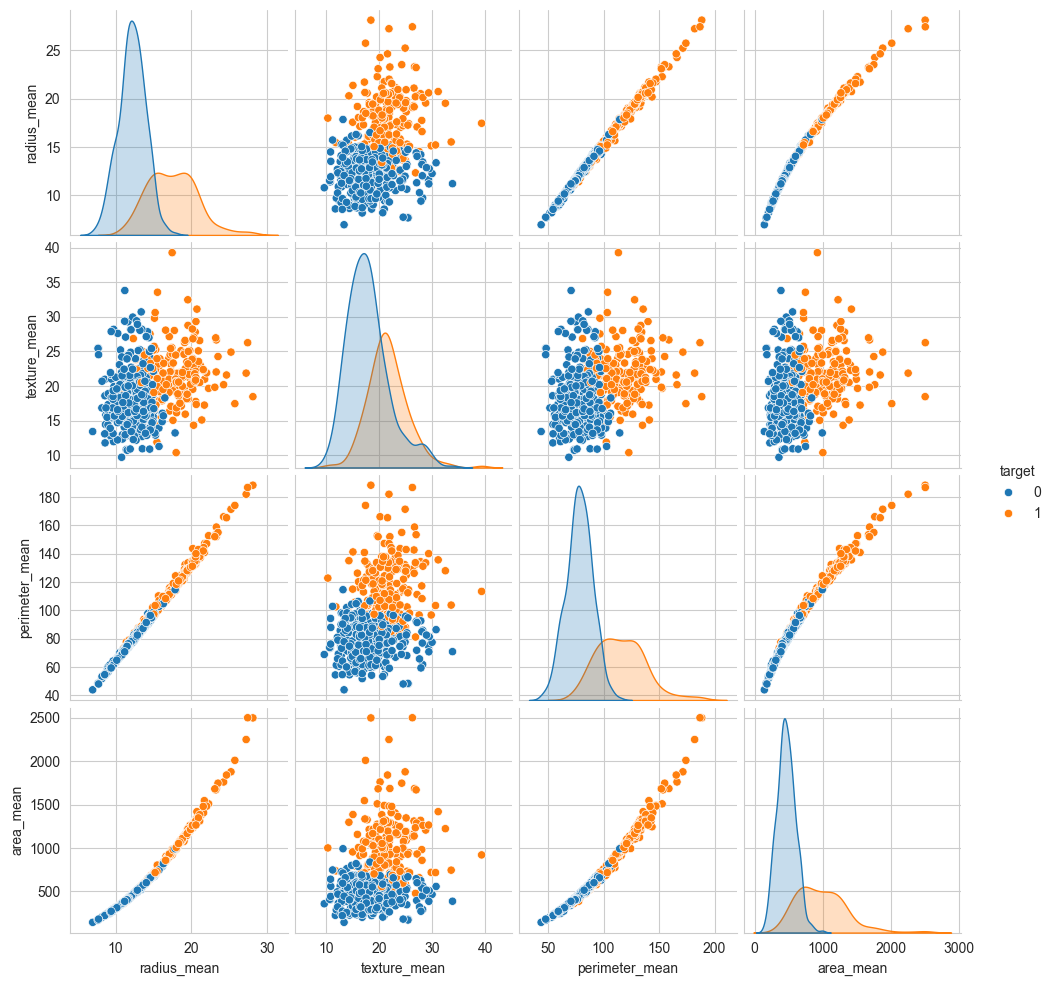

In [27]:
# Example corrected column names
sns.pairplot(df[['radius_mean','texture_mean','perimeter_mean','area_mean','target']], 
             hue='target', diag_kind='kde')
plt.show()


## Task 2: Data Preprocessing

In [9]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicates: {df.duplicated().sum()}")

Missing values:
target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Number of duplicates: 0


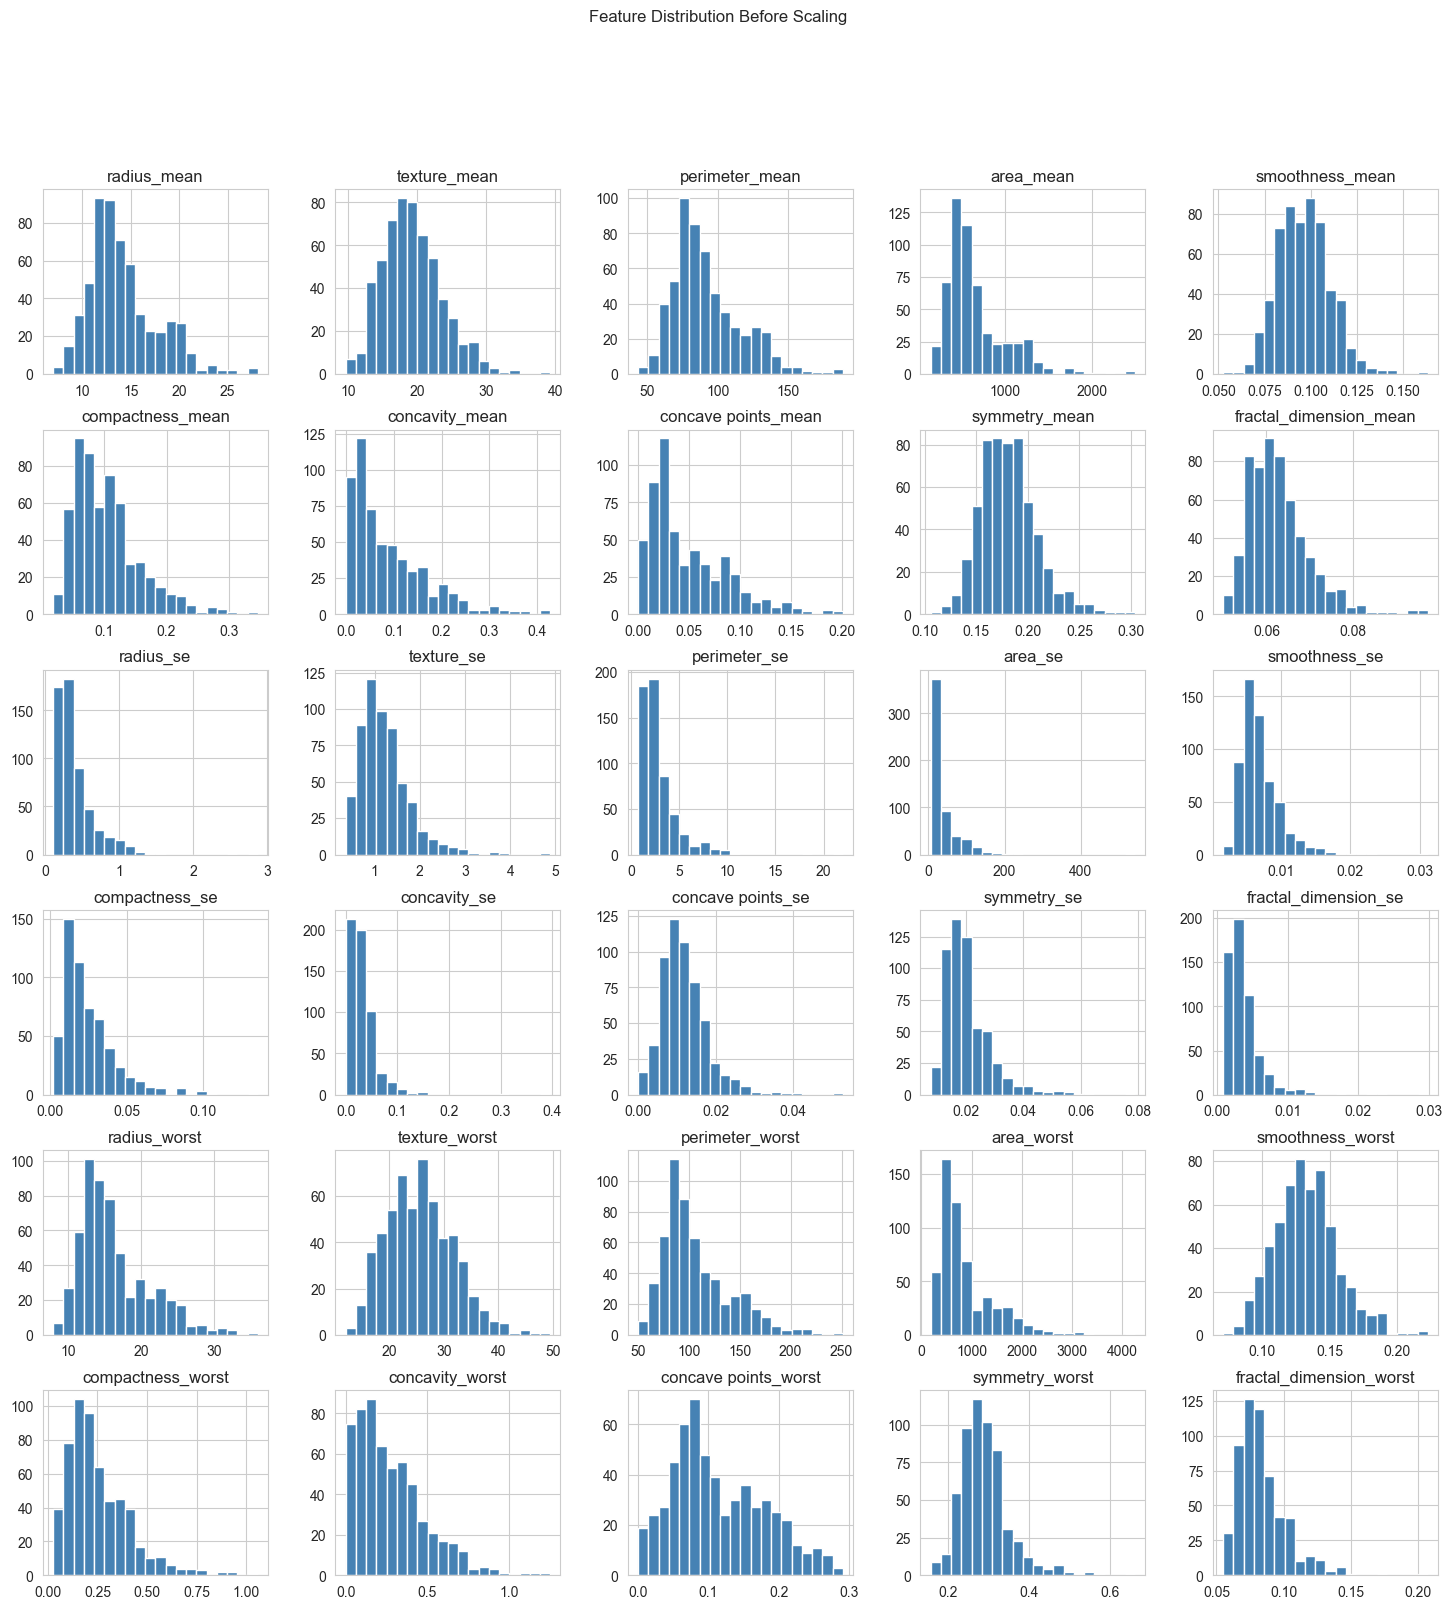

In [17]:
# Visualize feature distributions
df[feature_names].hist(figsize=(18,18), bins=20, color='steelblue')
plt.suptitle("Feature Distribution Before Scaling")
plt.show()


In [10]:
# Feature scaling
scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']

X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (455, 30)
Test set shape: (114, 30)


## Task 3: Build Machine Learning Models

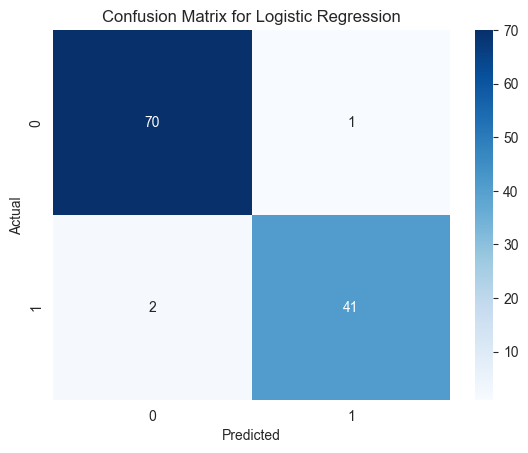

Logistic Regression:
  Accuracy: 0.9737
  Precision: 0.9762
  Recall: 0.9535
  F1 Score: 0.9647
  Confusion Matrix:
[[70  1]
 [ 2 41]]



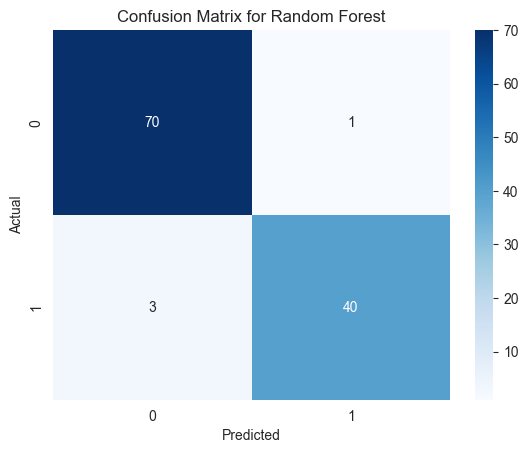

Random Forest:
  Accuracy: 0.9649
  Precision: 0.9756
  Recall: 0.9302
  F1 Score: 0.9524
  Confusion Matrix:
[[70  1]
 [ 3 40]]



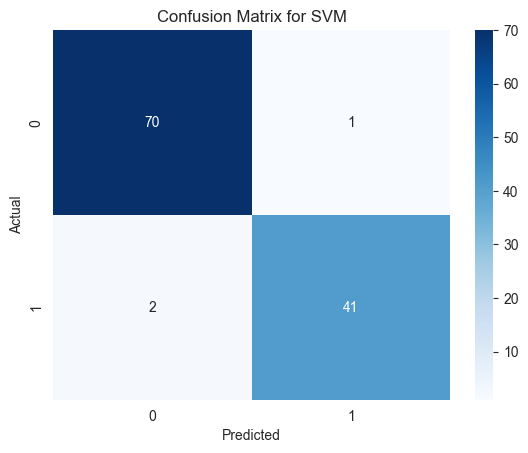

SVM:
  Accuracy: 0.9737
  Precision: 0.9762
  Recall: 0.9535
  F1 Score: 0.9647
  Confusion Matrix:
[[70  1]
 [ 2 41]]



In [24]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'confusion_matrix': cm
    }

    # Show confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Confusion Matrix:\n{cm}\n")

# ROC Curve Comparison

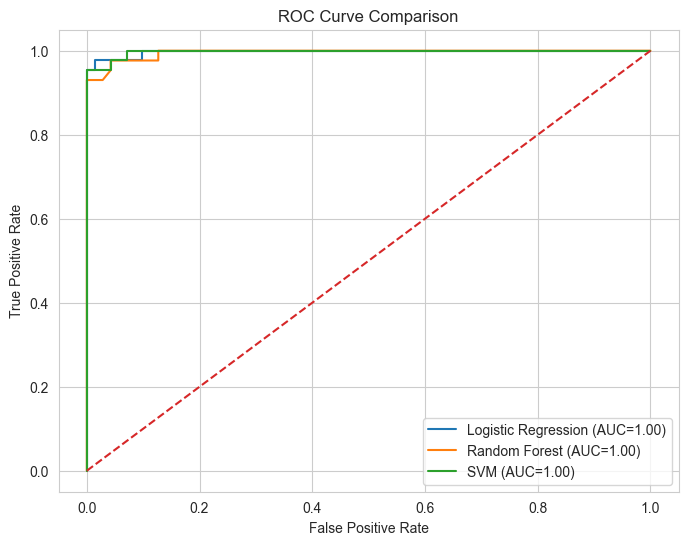

In [25]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], '--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.show()


## Task 4: Choose the Best Model

In [12]:
# Select best model based on F1 score
best_model_name = max(results, key=lambda x: results[x]['f1'])
best_model = models[best_model_name]

print(f"Best model: {best_model_name}")
print(f"F1 Score: {results[best_model_name]['f1']:.4f}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Reason: F1 score balances precision and recall, important for medical predictions

Best model: Logistic Regression
F1 Score: 0.9647
Accuracy: 0.9737


In [13]:
# Save the model and scaler
os.makedirs('models', exist_ok=True)

joblib.dump(best_model, 'models/breast_cancer_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

# Save metadata
metadata = {
    'model_name': best_model_name,
    'accuracy': results[best_model_name]['accuracy'],
    'f1_score': results[best_model_name]['f1'],
    'features': feature_names,
    'feature_means': X.mean(axis=0).tolist()  # Save mean values for default inputs
}
joblib.dump(metadata, 'models/model_metadata.pkl')

print("Model, scaler, and metadata saved successfully!")

Model, scaler, and metadata saved successfully!
